# Support Vector Machines (SVM)

### Theory


__Support Vector Machines__ work by finding a _separating hyperplane_


$$\{\mathbf{x} | \mathbf{w}^{T}\mathbf{x} = b\}$$

that separates the decision regions in a space of predictor variables. The _maximum margin separating hyperplane_ has the further property that it has the maximum distance from any training samples $x^{(i)}$. Maximum margin separating hyperplanes are preferred because they have lower generalization error. Finding this hyperplane on a given training set is the implicit optimization objective of the SVM classifier.

#### Maximization of the Margin

Define two hyperplanes parallel to some decision boundary (how the decision boundary is determined will be shown). Call the two hyperplanes the _positive_ and _negative_ hyperplanes:

$$ w_{0}+\mathbf{w}^{T}\mathbf{x}_{pos} = 1 $$

$$ w_{0}+\mathbf{w}^{T}\mathbf{x}_{neg} = -1 $$

Subtract the two equations to form:

$$ \mathbf{w}^{T}(\mathbf{x}_{pos}-\mathbf{x}_{neg}) = 2 $$

Divide both sides of this equation by the $L_{2}$ norm of $\mathbf{w}$ to obtain:

$$ \frac{\mathbf{w}^{T}(\mathbf{x}_{pos}-\mathbf{x}_{neg})}{||\mathbf{w}||} = \frac{2}{||\mathbf{w}||} $$

Maximizing the margin between the negative and positive hyperplanes corresponds to maximizing the LHS of the above equation. Inverting the equation, squaring it, and multiplying by 2 yields the following transformed equation:


$$ \frac{2||\mathbf{w}||^{2}}{ (\mathbf{w}^{T}(\mathbf{x}_{pos}-\mathbf{x}_{neg}))^{2}} = \frac{||\mathbf{w}||^{2}}{2} $$

thereby transforming the margin maximization into a quadratic minimization problem. The minimization problem is contrained by the fact that the samples have to be classified correctly. That is:

$$ w_{0}+\mathbf{w}^{T}\mathbf{x}^{(i)} \geq 1 \; if \; y^{(i)}=1$$

$$ w_{0}+\mathbf{w}^{T}\mathbf{x}^{(i)} \leq 1 \; if \; y^{(i)}=-1$$

or, more compactly:

$$ y^{(i)}(w_{0}+\mathbf{w}^{T}\mathbf{x}^{(i)}) \geq 1 \; \forall i$$

This results in the following quadratic minimization problem statement underlying the SVM classifier:


$$minimize \; \frac{||\mathbf{w}||^{2}}{2}$$

$$subject \; to:$$

$$y^{(i)}(w_{0}+\mathbf{w}^{T}\mathbf{x}^{(i)}) \geq 1 \; \forall i$$

#### Soft Margin Classification: Use of Slack Variables to Deal with Misclassifications and Nonlinearly Separable Data

Not all data is linearly separable to the extent that hyperplanes are a suitable decision boundary. Some samples may cross such a boundary and be misclassified. One way to still use hyperplanes while accepting a few (penalized) misclassifications is to use a _slack variable_ $\xi$. The slack variable allows the linear contraints to be relaxed for nonlinearly separable data. 

Using slack variables, the quadratic minimization problem becomes:

$$minimize \; \frac{||\mathbf{w}||^{2}}{2} + C(\sum_{i} \xi^{(i)})$$

$$subject \; to:$$

$$ \mathbf{w}^{T}\mathbf{x}^{(i)} \geq 1 \; if \; y^{(i)}=1-\xi^{(i)}$$

$$ \mathbf{w}^{T}\mathbf{x}^{(i)} < -1 \; if \; y^{(i)}=1+\xi^{(i)}$$

where $C$ is a _penalty_ or _cost_ associated to the misclassification of samples. Higher $C$ values more heavily penalize misclassifications. $C$ can be used as a tuning parameter to adjust the bias-variance tradeoff for the classifier and control the width of the hyperplane margin. 




### Plotting Utilities

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

       # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
       # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')

### Data Import

`iris` dataset from `scikit-learn`

In [9]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

### Cross-validation Dataset Splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



### Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Classification

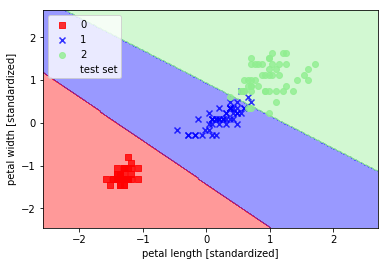

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Theory of Kernel SVM 

Kernel SVM maps the dataset into a higher-dimensional space in which the data is more easily separable by hyperplanes in the new higher-dimensional feature space. The mapping is accomplished by a mapping function $\phi(\cdot)$. The classifier may be nonlinear in the lower dimensional space, but $\phi(\cdot)$ transforms the classifer into a hyperplane the higher-dimensional space. 

Whereas in linear SVM relies on the dot product (e.g. $\mathbf{w}^{T}\mathbf{x}^{(i)}$), in the higher-dimensional space the dot product is replaced by a _kernel_:

$$k(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \phi(\mathbf{x}^{(i)})\cdot\phi(\mathbf{x}^{(j)})$$

or, equivalently:

$$k(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \phi(\mathbf{x}^{(i)})^{T}\phi(\mathbf{x}^{(j)})$$

The kernel function $k$ has a functional form that is easier to compute than the dot product $\phi(\mathbf{x}^{(i)})\cdot\phi(\mathbf{x}^{(j)})$, which is the main utility of $k$. To fulfill the condition of the above equations, $k$ must be a _positive semi-definite_ transformation (i.e. it must behave like a similarity metric). The exact condition that $k$ must satisfy is called Mercer's condition$^{1}$.

One of the most commonly used kernel functions is th __Gaussian Radial Basis function (RBF)__: 

$$k(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = exp(-\gamma ||\mathbf{x}^{(i)} - \mathbf{x}^{(j)} ||^{2})$$

where $\gamma$ is a free parameter to be optimized. It will be shown that changing $\gamma$ will make the decision boundaries more "conformal" in the the lower-dimensional space (as is shown below). 

__NB:__ Due to operating in a higher-dimensional feature space, Kernel SVM suffers from increased generalization error relative to linear SVM. However, this can be overcome through then inclusion of more samples in the training set. 


#### Kernel SVM Applied to the Dataset

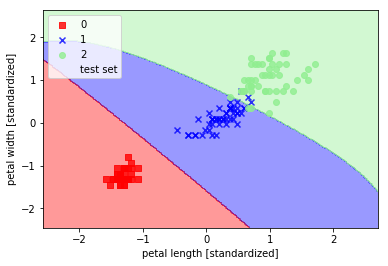

In [13]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


__NB__: The nonlinear decision boundary.

#### Increasing $\gamma$ and its Effect on the Decision Boundary

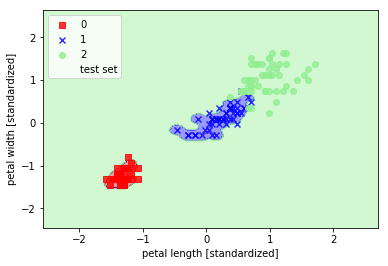

In [14]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Online Learning with SGDClassifier (TO BE COMPLETED)

In [15]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### References

[1] (https://en.wikipedia.org/wiki/Mercer%27s_theorem#Mercer's_condition)